<b> DATA ANALIS TES CASE </b>

Oleh : Handri Mauludin Maulana, S.Si.

Pada projek ini, dilakukan pengolahan data mentah pada Excel. Data yang disajikan merupakan track tanggal sewa atm, lokasi 
beserta periode tanggal penaggihan selama 101 Periode. Data yang diberikan haruslah melalui tahap cleansing data. Hal ini
karena data banyak yang tidak sesuai standar seperti adanya salah pengetikan, data kosong, dan sebagainya. Sehingga pada tahap
ini cleansing data dilakukan dengan cara hybrid yaitu melalui Ms. Excel dan pengolahan python.

Pada tahap pertama cleansing data, data dibersihkan di Ms. Excel agar sesuai standar data seperti menghilangkan kolom
field merged, data kosong, dsb. Sehingga pada projek ini saya melampirkan data Excel terbaru di email ini yang telah diedit 
agar dapat memenuhi standar cleansing data di Python dan dapat terbaca ketika mengeksekusi file skrip JupyterNotebook ini. Ataupun data
dapat didownload melalui repository https://github.com/handrimaulud/data-science/blob/main/Dataset/data-set_edited_row.xlsx
ataupun apabila tidak dapat dijalankan, projek ini akan diunggah ke dalam repository https://github.com/handrimaulud/data-science/blob/main/Data-science-practice/DA_Business.ipynb. klik "Display to rendered blob" Sehingga dari repository tersebut dapat dilihat bagaimana proses projek ini dilakukan.
Setelah melakukan tahap cleansing data di Ms. Excel, langkah selanjutnya adalah cleansing data melalui Python yang akan 
dijelaskan melalui JupyterNotebook ini.

1. Import data file excel yang telah diedit/ clenasing data

In [2]:
import pandas as pd          #import packages pandas
file = 'data-set_edited_row.xlsx'       #file ini ditempatkan pada lokal direktori yang dapat menyebabkan perbedaan direktori
xl = pd.ExcelFile(file)                 #antar user, sehingga perlu diperhatkan file yang akan diunggah dan tempat direktorinya
print(xl.sheet_names)        #melihat ada berapa sheet yang terdapat di file

['SEWAATM', 'Data Aktifitas']


In [3]:
df1 = xl.parse('SEWAATM', header=6)    #mengolah sheet pertama bernama SEWAATM

In [4]:
print(df1.head())                     #melihat dataset SEWAATM yang telah diimport ke dalam JupyterNotebook

    No      Tanggal Request          Nama Lokasi              Kota MASA SEWA  \
0  1.0  2010-09-21 00:00:00             PLN Kota    Jkt-HUB II RPC       NaN   
1  2.0  2010-09-21 00:00:00             Perumnas     Jkt-HUB I RPC       NaN   
2  3.0  2010-09-21 00:00:00        Tip Top Depok  Jkt-HUB VIII RPC       NaN   
3  4.0  2010-09-21 00:00:00    Tip Top Pdk Bambu    Jkt-HUB VI RPC       NaN   
4  5.0  2010-09-21 00:00:00  Tip Top Rawamangun        JKT-HUB VII       NaN   

              Delivery     Type Jatuh tempo Tag 3-4th  No. Inv.1  \
0  2010-10-07 00:00:00      522   2013-10-01 00:00:00  379-11-10   
1  2010-10-07 00:00:00      522   2013-10-01 00:00:00  379-11-10   
2  2010-10-07 00:00:00      522   2013-10-01 00:00:00  379-11-10   
3  2010-10-07 00:00:00      522   2013-10-01 00:00:00  379-11-10   
4  2010-10-07 00:00:00  529EPP7   2013-10-01 00:00:00  379-11-10   

             Periode.1  ...  JT48.98 No. Inv.99 Periode.99  JT48.99  \
0  2010-10-01 00:00:00  ...      NaN   

In [5]:
#Pada tahap ini, merupakan membuang kolom field yang tidak relevan dengan pengolahan data, yang mana angka-angka yang 
#ditampilan merupakan index kolom ke

df1 = df1.drop(df1.columns[[0,1,8,10,
                           11,13,
                           14,16,
                           17,19,
                           20,22,
                           23,25,
                           26,28,
                           29,31,
                           32,
                           34,
                            36,
                            38,
                            40,
                            42,
                            44,
                            46,
                            48,
                            50,
                            52,
                            54,
                            56,
                            58,
                            60,
                            62,
                            64,
                            66,
                            68,
                            70,
                            72,
                            74,
                            76,
                            78,
                            80,
                            82,
                            84,86,
                            87,89,
                            90,
                            92,
                            94,
                            96,
                            98,
                            100,102,
                            103,
                            105,
                            107,
                            109,111,
                            112,114,
                            115,117,
                            118,120,
                            121,123,
                            124,126,
                            127,
                            129,131,
                            132,134,
                            135,137,
                            138,140,
                            141,143,
                            144,146,
                            147,149,
                            150,152,
                            153,155,
                            156,158,
                            159,161,
                            162,164,
                            165,167,
                            168,170,
                            171,173,
                            174,176,
                            177,179,
                            180,182,
                            183,185,
                            186,188,
                            189,191,
                            192,194,
                            195,197,
                            198,200,
                            201,203,
                            204,206,
                            207,209,
                            210,212,
                            213,215,
                            216,218,
                            219,221,
                            222,224,
                            225,227,
                            228,230,
                            231,233,
                            234,236,
                            237,239,
                            240,242,
                            243,245,
                            246,248,
                            249,251,
                            252,254,
                            255,257,
                            258,260,
                            261,263,
                            264,266,
                            267,269,
                            270,272,
                            273,275,
                            276,278]], axis=1)

In [6]:
df1 = df1[df1['Kota'].notna()]  #menghapus nilai yang hilang pada field kolom kota untuk memudahkan pengolahan data analis

In [7]:
df1.sort_values("Kota", axis=0, ascending=True, inplace=True)
df1.reset_index(drop=True, inplace=True)               #mengurutkan data field kota agar mudah diproses saat cleansing data

In [8]:
pd.unique(df1['Kota'].values.tolist())          #melihat daftar kota yang ada di dalam dataset SEWAATM

array(['BALIKPAPAN', 'BALIKPAPAN ', 'BALIKPAPAN rpc', 'BANDA ACEH',
       'BANDA ACEH ', 'BANDA ACEH RPC', 'BANDAR LAMPUNG', 'BANDUNG',
       'BANDUNG ', 'BANDUNG CANCEL', 'BANDUNG OFF', 'BANJARMASIN',
       'BANJARMASIN ', 'BANYUWANGI', 'BATAM', 'BATAM ', 'BATAM CANCEL',
       'BATAM OFF', 'BATAM RPC', 'BOGOR', 'Banda Aceh-cancel',
       'Bandar Lampung OFF', 'Bandar Lampung cancel', 'Bandung OFF',
       'Bandung hold', 'Bandung relok', 'Banjarmasin OFF', 'Bogor RPC',
       'CILEGON', 'CIREBON', 'CIREBON ', 'CIREBON CANCEL', 'CIREBON hold',
       'CIREBON-OFF', 'CIREBON-RPC', 'Cianjur RPC', 'Cikarang-off',
       'Cilegon', 'Cilegon OFF', 'Cilegon RPC', 'Cirebon', 'DENPASAR',
       'DENPASAR CANCEL', 'DENPASAR OFF', 'Denpasar', 'Denpasar ',
       'Denpasar OFF', 'Denpasar Rpc', 'JAMBI', 'JAMBI CANCEL',
       'JAMBI OFF', 'JEMBER', 'JKT-DPTI', 'JKT-HUB I', 'JKT-HUB I CANCEL',
       'JKT-HUB I HOLD', 'JKT-HUB I OFF', 'JKT-HUB II', 'JKT-HUB II HOLD',
       'JKT-HUB II OFF', 

Terlihat bahwa terdapat banyak sekali data/nilai yang tidak standar, sehingga diperlukan mapping atau standarisasi dengan cara 
memperbaiki kata yang duplikat.

In [9]:
#Tahap ini merupakan tahap cleansing data yang terduplikat pada kolom kota, sehingga diperlukan mapping
#Tahap ini juga tidak diberikan informasi mengenai istilah OFF, Hold, Relog, RPC, dsb sehingga pada projek ini dikelompokkan
#berdasarkan data yang relevan satu sama lain agar tidak menghilang informasi pada saat melakukan analisis data
#Ketentuan dari data cleansing ini adalah apabila Kota tidak diikuti oleh status apapun maka dikategorikan sebagai S
#Kategori S ini diduga merupakan status Sukses dalam hal sewa menyewa atm

#Catatan: Tidak diberi informasi mengenai data

mapping = {'BALIKPAPAN':'Balikpapan S',
           'BALIKPAPAN ':'Balikpapan S',
           'BALIKPAPAN rpc':'Balikpapan RPC',
           'BANDA ACEH':'Aceh S',
           'BANDA ACEH ':'Aceh S',
           'BANDA ACEH RPC':'Aceh RPC', 
           'BANDAR LAMPUNG':'Lampung S',
           'BANDUNG':'Bandung S',
           'BANDUNG ':'Bandung S',
           'BANDUNG CANCEL':'Bandung Cancel',
           'BANDUNG OFF':'Bandung Cancel',
           'BANJARMASIN':'Banjarmasin S',
           'BANJARMASIN ':'Banjarmasin S',
           'BANYUWANGI':'Banyuwangi S',
           'BATAM':'Batam S', 
           'BATAM ':'Batam S',
           'BATAM CANCEL':'Batam Cancel',
           'BATAM OFF':'Batam oFF',
           'BATAM RPC':'Batam RPC', 
           'BOGOR':'Bogor S',
           'Banda Aceh-cancel':'Aceh Cancel',
           'Bandar Lampung OFF':'Lampung OFF',
           'Bandar Lampung cancel':'Lampung Cancel',
           'Bandung OFF':'Bandung OFF',
           'Bandung hold':'Bandung Hold',
           'Bandung relok':'Bandung Relog',
           'Banjarmasin OFF':'Banjarmasin OFF',
           'Bogor RPC':'Bogor RPC',
           'CILEGON':'Cilegon S',
           'CIREBON':'Cirebon S', 
           'CIREBON ':'Cirebon S',
           'CIREBON CANCEL':'Cirebon Cancel',
           'CIREBON hold':'Cirebon Hold',
           'CIREBON-OFF':'Cirebon OFF',
           'CIREBON-RPC':'Cirebon RPC', 
           'Cianjur RPC':'Cianjur RPC',
           'Cikarang-off':'Cikarang OFF',
           'Cilegon':'Cilegon S',
           'Cilegon OFF':'Cilegon OFF',
           'Cilegon RPC':'Cilegon RPC',
           'Cirebon':'Cirebon S',
           'DENPASAR':'Denpasar S',
           'DENPASAR CANCEL':'Denpasar Cancel',
           'DENPASAR OFF':'Denpasar OFF',
           'Denpasar':'Denpasar S',
           'Denpasar ':'Denpasar S',
           'Denpasar OFF':'Denpasar OFF',
           'Denpasar Rpc':'Denpasar RPC',
           'JAMBI':'Jambi S', 
           'JAMBI CANCEL':'Jambi Cancel',
           'JAMBI OFF':'Jambi OFf', 
           'JEMBER':'Jember S', 
           'JKT-DPTI':'Jakarta S',
           'JKT-HUB I':'Jakarta S',
           'JKT-HUB I CANCEL':'Jakarta Cancel',
           'JKT-HUB I HOLD':'Jakarta Hold',
           'JKT-HUB I OFF':'Jakarta OFF',
           'JKT-HUB II':'Jakarta S', 
           'JKT-HUB II HOLD':'Jakarta Hold',
           'JKT-HUB II OFF':'Jakarta OFF',
           'JKT-HUB III':'Jakarta S',
           'JKT-HUB III CANCEL':'Jakarta Cancel',
           'JKT-HUB III HOLD':'Jakarta Hold',
           'JKT-HUB III OFF':'Jakarta OFF',
           'JKT-HUB IV':'Jakarta S', 
           'JKT-HUB IV ':'Jakarta S',
           'JKT-HUB IV-HOLD':'Jakarta Hold', 
           'JKT-HUB IX':'Jakarta S', 
           'JKT-HUB IX cancel':'Jakarta Cancel',
           'JKT-HUB V':'Jakarta S',
           'JKT-HUB V CANCEL':'Jakarta Cancel',
           'JKT-HUB V OFF':'Jakarta OFF',
           'JKT-HUB VI':'Jakarta S',
           'JKT-HUB VI-HOLD':'Jakarta Hold',
           'JKT-HUB VII':'Jakarta S', 
           'JKT-HUB VII OFF':'Jakarta OFF',
           'JKT-HUB VII-HOLD':'Jakarta Hold', 
           'JKT-HUB VIII':'Jakarta S',
           'JKT-HUB VIII OFF':'Jakarta OFF',
           'JKT-HUB X':'Jakarta S',
           'JKT-HUB XI':'Jakarta S',
           'JKT-HUB XI ':'Jakarta S',
           'JKT-HUB XI CANCEL':'Jakarta Cancel',
           'JKT-HUB XI OFF':'Jakarta OFF',
           'JKT-HUB XII':'Jakarta S', 
           'Jakarta Barat cancel':'Jakarta Cancel',
           'Jakarta Pusat cancel':'Jakarta Cancel',
           'Jakarta Timur cancel':'Jakarta Cancel',
           'Jambi':'Jambi S',
           'Jember ':'Jember S',
           'Jember OFF':'Jember OFF',
           'Jember RPC':'Jember RPC',
           'Jkt-HUB I CANCEL':'Jakarta Cancel',
           'Jkt-HUB I OFF':'Jakarta OFF',
           'Jkt-HUB I OFF ':'Jakarta OFF',
           'Jkt-HUB I RPC':'Jakarta RPC',
           'Jkt-HUB I off':'Jakarta OFF',
           'Jkt-HUB II OFF':'Jakarta OFF',
           'Jkt-HUB II RPC':'Jakarta RPC',
           'Jkt-HUB II off':'Jakarta OFF',
           'Jkt-HUB III HOLD':'Jakarta Hold',
           'Jkt-HUB III RPC':'Jakarta RPC',
           'Jkt-HUB III cancel':'Jakarta Cancel',
           'Jkt-HUB IV OFF':'Jakarta OFF',
           'Jkt-HUB IV RPC':'Jakarta RPC',
           'Jkt-HUB V HOLD':'Jakarta Hold',
           'Jkt-HUB V OFF':'Jakarta OFF',
           'Jkt-HUB V RPC':'Jakarta RPC', 
           'Jkt-HUB V cancel':'Jakarta Cancel',
           'Jkt-HUB V-OFF':'Jakarta OFF', 
           'Jkt-HUB VI ':'Jakarta S',
           'Jkt-HUB VI OFF':'Jakarta OFF',
           'Jkt-HUB VI RPC':'Jakarta RPC',
           'Jkt-HUB VII CANCEL':'Jakarta Cancel', 
           'Jkt-HUB VII OFF':'Jakarta OFF',
           'Jkt-HUB VII RPC':'Jakarta RPC',
           'Jkt-HUB VII cancel':'Jakarta Cancel', 
           'Jkt-HUB VIII':'Jakarta S', 
           'Jkt-HUB VIII HOLD':'Jakarta Hold',
           'Jkt-HUB VIII OFF':'Jakarta OFF', 
           'Jkt-HUB VIII RPC':'Jakarta RPC', 
           'Jkt-HUB X':'Jakarta S', 
           'Jkt-HUB XI':'Jakarta S',
            'KARAWANG':'Karawang S', 
            'KEDIRI':'Kediri S', 
            'KEDIRI OFF':'Kediri OFF', 
            'KENDARI':'Kendari S', 
            'KUPANG':'Kupang S',
            'Karawang':'karawang S',
            'Karawang OFF':'karawang OFF',
            'Karawang RPC':'karawang RPC', 
            'Kediri ':'Kediri S',
            'Kediri RPC':'Kediri RPC', 
            'Kupang':'Kupang S', 
            'MADIUN':'Madiun S', 
            'MAGELANG':'Magelang S', 
            'MAKASAR':'Makasar S',
            'MAKASAR CANCEL':'Makasar Cancel', 
            'MALANG':'Malang S', 
            'MALANG OFF':'Malang OFF', 
            'MANADO':'Manado S',
            'MANADO ':'Manado S',
            'MANADO OFF':'Manado OFF', 
            'MANADO rpc':'Manado RPC', 
            'MANADO-CANCEL':'Manado Cancel', 
            'MATARAM':'Mataram S',
            'MEDAN':'Medan S',
            'MEDAN ':'Medan S', 
            'MEDAN CANCEL':'Medan Cancel', 
            'MEDAN OFF':'Medan OFF', 
            'Madiun ':'Madiun S', 
            'Madiun RPC':'Madiun RPC',
            'Magelang':'Magelang S', 
            'Magelang RPC':'Magelang RPC', 
            'Makasar':'Makasar S', 
            'Makasar ':'Makasar S', 
            'Makasar OFF':'Makasar OFF',
            'Makasar rpc':'Makasar RPC', 
            'Malang':'Malang S', 
            'Malang ':'Malang S', 
            'Malang Rpc':'Malang RPC',
            'Mataram':'Mataram S',
            'Medan':'Medan S', 
            'Medan ':'Medan S', 
            'Medan  OFF':'Medan OFF',
            'Medan OFF':'Medan OFF', 
            'Medan RPC':'Medan RPC',
            'PADANG':'Padang S', 
            'PADANG CANCEL':'Padang Cancel', 
            'PALEMBANG':'Palembang S', 
            'PALU':'Palu S', 
            'PARE-PARE':'Pare-Pare S',
            'PEKANBARU':'Pekanbaru S',
            'PONTIANAK':'Pontianak S',
            'PROBOLINGGO':'Probolinggo S',
            'PROBOLINGGO CANCEL':'Probolinggo Cancel',
            'PURWOKERTO':'Purwokerto S', 
            'PURWOKERTO ':'Purwokerto S', 
            'Padang':'Padang S', 
            'Padang ':'Padang S', 
            'Padang rpc':'Padang RPC',
            'Palembang':'Palembang S', 
            'Palembang rpc':'Palembang RPC',
            'Pare-Pare OFF':'Pare-Pare OFF', 
            'Pare-Pare rpc':'Pare-Pare RPC',
            'Pekanbaru':'Pekanbaru S',
            'Pekanbaru ':'Pekanbaru S', 
            'Pekanbaru OFF':'Pekanbaru OFF',
            'Pekanbaru RPC':'Pekanbaru RPC',
            'Pekanbaru cancel':'Pekanbaru Cancel', 
            'Pekanbaru rpc':'Pekanbaru RPC', 
            'Pontianak':'Pontianak S', 
            'Pontianak ':'Pontianak S',
            'Pontianak OFF':'Pontianak OFF', 
            'Pontianak relok':'Pontianak Relog', 
            'Pontianak rpc':'Pontianak RPC', 
            'Probolinggo':'Probolinggo S',
            'Probolinggo ':'Probolinggo S', 
            'Probolinggo OFF':'Probolinggo OFF',
            'Probolinggo RPC':'Probolinggo RPC',
            'Purwokerto':'Purwokerto S',
            'Purwokerto ':'Purwokerto S', 
            'Purwokerto RPC':'Purwokerto RPC', 
            'Purwokerto hold':'Purwokerto Hold',
            'Purwokerto off':'Purwokerto OFF',
            'SAMARINDA':'Samarinda S',
            'SEMARANG':'Semarang S', 
            'SIDOARJO':'Sidoarjo S',
            'SIDOARJO CANCEL':'Sidoarjo Cancel', 
            'SOLO':'Solo S',
            'SOLO CANCEL':'Solo Cancel', 
            'SOLO OFF':'Solo OFF', 
            'SORONG':'Sorong S',
            'SUKABUMI':'Sukabumi S', 
            'SUKABUMI RPC':'Sukabumi RPC', 
            'SURABAYA':'Surabaya S', 
            'Samarinda':'Samarinda S',
            'Samarinda ':'Samarinda S',
            'Samarinda OFF':'Samarinda OFF', 
            'Samarinda Rpc':'Samarinda RPC',
            'Samarinda off':'Samarinda OFF', 
            'Semarang':'Semarang S',
            'Semarang ':'Semarang S', 
            'Semarang CANCEL':'Semarang Cancel', 
            'Semarang OFF':'Semarang OFF', 
            'Semarang RPC':'Semarang RPC',
            'Sidoarjo':'Sidoarjo S', 
            'Sidoarjo ':'Sidoarjo S',
            'Sidoarjo RPC':'Sidoarjo RPC', 
            'Sidoarjo hold':'Sidoarjo Hold',
            'Sidoarjo off':'Sidoarjo OFF', 
            'Solo':'Solo S', 
            'Solo ':'Solo S', 
            'Solo OFF':'Solo OFF', 
            'Solo RPC':'Solo RPC',
            'Solo-cancel':'Solo Cancel', 
            'Sukabumi':'Sukabumi S',
            'Sukabumi OFF':'Sukabumi OFF',
            'Surabaya':'Surabaya S', 
            'Surabaya ':'Surabaya S',
            'Surabaya OFF':'Surabaya OFF', 
            'Surabaya RPC':'Surabaya RPC',
            'Surabaya cancel':'Surabaya Cancel', 
            'Surabaya off':'Surabaya OFF',
            'TANJUNG PINANG':'TanjungPinang S',
            'Tasikmalaya':'Tasikmalaya S', 
            'Tasikmalaya ':'Tasikmalaya S', 
            'Tasikmalaya RPC':'Tasikmalaya RPC', 
            'Tegal':'Tegal S',
            'Tegal OFF':'Tegal OFF', 
            'Tegal hold':'Tegal Hold', 
            'YOGYAKARTA':'Yogyakarta S', 
            'Yogyakarta':'Yogyakarta S',
            'Yogyakarta OFF':'Yogyakarta OFF',
            'Yogyakarta Rpc':'Yogyakarta RPC'}

df1['Kota'] = df1['Kota'].apply(mapping.get)

In [10]:
df1[['Kota','Status']] = df1['Kota'].str.split(' ', expand=True)  #memisahkan data kota dengan status istilah didalamnya

In [11]:
pd.unique(df1['Status'].values.tolist())   #Untuk menghindar salah pengetikan pada kolom status dilakukan mapping sekali lagi

array(['S', 'RPC', 'Cancel', 'oFF', 'OFF', 'Hold', 'Relog', 'OFf', None],
      dtype=object)

In [12]:
#mapping dilakukan pada kolom field status
map = {'S':'S', 'RPC':'RPC', 'Cancel':'Cancel', 'oFF':'OFF', 'OFF':'OFF', 'Hold':'Hold', 'Relog':'Relog', 'OFf':'OFF'}
df1['Status'] = df1['Status'].apply(map.get)

In [13]:
cols = df1.columns.tolist()   #melihat daftar kolom field yang ada dalam dataset SEWAATM
print(cols)

['Nama Lokasi', 'Kota', 'MASA SEWA', 'Delivery', 'Type', 'Jatuh tempo Tag 3-4th', 'Periode.1', 'Periode.2', 'Periode.3', 'Periode.4', 'Periode.5', 'Periode.6', 'Periode.7', 'Periode.8', 'Periode.9', 'Periode.10', 'Periode.11', 'Periode.12', 'Periode.13', 'Periode.14', 'Periode.15', 'Periode.16', 'Periode.17', 'Periode.18', 'Periode.19', 'Periode.20', 'Periode.21', 'Periode.22', 'Periode.23', 'Periode.24', 'Periode.25', 'Periode.26', 'Periode.27', 'Periode.28', 'Periode.29', 'Periode.30', 'Periode.31', 'Periode.32', 'Periode.33', 'Periode.34', 'Periode.35', 'Periode.36', 'Periode.37', 'Periode.37.2', 'Periode.38', 'Periode.39', 'Periode.40', 'Periode.41', 'Periode.42', 'Periode.43', 'Periode.44', 'Periode.45', 'Periode.46', 'Periode.47', 'Periode.48', 'Periode.49', 'Periode.50', 'Periode.51', 'Periode.52', 'Periode.53', 'Periode.54', 'Periode.55', 'Periode.56', 'Periode.57', 'Periode.58', 'Periode.59', 'Periode.60', 'Periode.61', 'Periode.62', 'Periode.63', 'Periode.64', 'Periode.65', '

In [14]:
#proses ini mengurutkan kembali kolom field agar kolom kota berdekatan dengan kolom status
df1 = df1[['Nama Lokasi', 'Kota', 'Status','MASA SEWA', 'Delivery', 'Type', 'Jatuh tempo Tag 3-4th', 'Periode.1', 
           'Periode.2', 'Periode.3', 'Periode.4', 'Periode.5', 'Periode.6', 'Periode.7', 'Periode.8', 'Periode.9', 
           'Periode.10', 'Periode.11', 'Periode.12', 'Periode.13', 'Periode.14', 'Periode.15', 'Periode.16', 'Periode.17', 
           'Periode.18', 'Periode.19', 'Periode.20', 'Periode.21', 'Periode.22', 'Periode.23', 'Periode.24', 'Periode.25', 
           'Periode.26', 'Periode.27', 'Periode.28', 'Periode.29', 'Periode.30', 'Periode.31', 'Periode.32', 'Periode.33',
           'Periode.34', 'Periode.35', 'Periode.36', 'Periode.37', 'Periode.37.2', 'Periode.38', 'Periode.39', 'Periode.40',
           'Periode.41', 'Periode.42', 'Periode.43', 'Periode.44', 'Periode.45', 'Periode.46', 'Periode.47', 'Periode.48',
           'Periode.49', 'Periode.50', 'Periode.51', 'Periode.52', 'Periode.53', 'Periode.54', 'Periode.55', 'Periode.56',
           'Periode.57', 'Periode.58', 'Periode.59', 'Periode.60', 'Periode.61', 'Periode.62', 'Periode.63', 'Periode.64',
           'Periode.65', 'Periode.66', 'Periode.67', 'Periode.68', 'Periode.69', 'Periode.70', 'Periode.71', 'Periode.72', 
           'Periode.73', 'Periode.74', 'Periode.75', 'Periode.76', 'Periode.77', 'Periode.78', 'Periode.79', 'Periode.80', 
           'Periode.81', 'Periode.82', 'Periode.83', 'Periode.84', 'Periode.85', 'Periode.86', 'Periode.87', 'Periode.88', 
           'Periode.89', 'Periode.90', 'Periode.91', 'Periode.92', 'Periode.93', 'Periode.94', 'Periode.95', 'Periode.96', 
           'Periode.97', 'Periode.98', 'Periode.99', 'Periode.100', 'Periode.101']]

In [15]:
df1.dtypes   #melihat tipe data setiap kolom agar memudahkan penggantian tipe data saat melakukan cleansing data yang kosong

Nama Lokasi            object
Kota                   object
Status                 object
MASA SEWA              object
Delivery               object
                    ...      
Periode.97     datetime64[ns]
Periode.98     datetime64[ns]
Periode.99     datetime64[ns]
Periode.100    datetime64[ns]
Periode.101    datetime64[ns]
Length: 109, dtype: object

In [16]:
#mengubah tipe data datetime pada beberapa kolom menjadi tipe data objek
column_dt = ['Periode.62','Periode.69','Periode.71','Periode.73','Periode.74','Periode.75','Periode.76','Periode.77',
          'Periode.78','Periode.79','Periode.80','Periode.81','Periode.82','Periode.83','Periode.84','Periode.85',
          'Periode.86','Periode.87','Periode.88','Periode.96','Periode.97','Periode.98','Periode.99','Periode.100',
          'Periode.101']
for y in column_dt:
    df1[y] = df1[y].astype(str)

In [17]:
#tahap ini adalah proses standarisasi kolom yang hilang atau tidak ada informasi, dimana penyebab tidak ada informasinya 
#tersebut dapat dikarena adanya ketidaklanjutan mengenai proses SEWAATM ataupun human error yang menyebabkan informasi periode
#tidak ada

import numpy as np
df1.replace({np.nan: None})    #mengganti informasi yang tidak ada menjadi None

column = ['Periode.1','Periode.2','Periode.3','Periode.4','Periode.5','Periode.6','Periode.7','Periode.8',
          'Periode.9','Periode.10','Periode.11','Periode.12','Periode.13','Periode.14','Periode.15','Periode.16',
          'Periode.17','Periode.18','Periode.19','Periode.20','Periode.21','Periode.22','Periode.23','Periode.24',
          'Periode.25','Periode.26','Periode.27','Periode.28','Periode.29','Periode.30','Periode.31','Periode.32',
          'Periode.33','Periode.34','Periode.35','Periode.36','Periode.37','Periode.37.2','Periode.38','Periode.39',
          'Periode.40','Periode.41','Periode.42','Periode.43','Periode.44','Periode.45','Periode.46','Periode.47',
          'Periode.48','Periode.49','Periode.50','Periode.51','Periode.52','Periode.53','Periode.54','Periode.55',
          'Periode.56','Periode.57','Periode.58','Periode.59','Periode.60','Periode.61','Periode.62','Periode.63',
          'Periode.64','Periode.65','Periode.66','Periode.67','Periode.68','Periode.69','Periode.70','Periode.71',
          'Periode.72','Periode.73','Periode.74','Periode.75','Periode.76','Periode.77','Periode.78','Periode.79',
          'Periode.80','Periode.81','Periode.82','Periode.83','Periode.84','Periode.85','Periode.86','Periode.87',
          'Periode.88','Periode.89','Periode.90','Periode.91','Periode.92','Periode.93','Periode.94','Periode.95',
          'Periode.96','Periode.97','Periode.98','Periode.99','Periode.100','Periode.101']

for y in column:
    df1[y] = df1[y].apply(lambda x : None if x=="NaT" else x)

df1.replace({None: 0})    #Agar mudah dianalisis, kata None diganti menjadi bilangan 0 yang artinya tidak ada informasi

,Nama Lokasi,Kota,Status,MASA SEWA,Delivery,Type,Jatuh tempo Tag 3-4th,Periode.1,Periode.2,Periode.3,...,Periode.92,Periode.93,Periode.94,Periode.95,Periode.96,Periode.97,Periode.98,Periode.99,Periode.100,Periode.101
0,CARREFOUR BALIKPAPAN DOWN VILLAGE,Balikpapan,S,0,2015-06-25 00:00:00,529EPP7CL,2018-08-01 00:00:00,Agt-15,2015-09-01 00:00:00,2015-10-01 00:00:00,...,0,0,0,0,0,0,0,0,0,0
1,BALIKPAPAN SUPER BLOK (BSB),Balikpapan,S,0,2015-06-25 00:00:00,529EPP7CL,2018-08-01 00:00:00,Agt-15,2015-09-01 00:00:00,2015-10-01 00:00:00,...,0,0,0,0,0,0,0,0,0,0
2,BKP Karang Jati,Balikpapan,S,4,2020-01-27 00:00:00,GRG,2024-02-01 00:00:00,2020-02-01 00:00:00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PLN Balikpapan,Balikpapan,S,4,2020-03-12 00:00:00,GRG,2024-03-01 00:00:00,2020-03-01 00:00:00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Balikpapan Baru,Balikpapan,S,4,2020-03-12 00:00:00,GRG,2024-03-01 00:00:00,2020-03-01 00:00:00,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,ASRI Medical Centre YK 2,Yogyakarta,RPC,0,2011-03-23 00:00:00,522,2014-04-01 00:00:00,Mei'11,Mei'11,Jun'11,...,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01,0,0,0,0,0
1243,KK Kusumanegara / Hotel grand Dafam,Yogyakarta,RPC,0,2011-01-18 00:00:00,522,2014-02-01 00:00:00,Mar'11,Mar'11,Apr'11,...,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01,2019-05-01,0,0,0,0
1244,KK UII Condong Catur,Yogyakarta,RPC,0,2011-01-18 00:00:00,522,2014-02-01 00:00:00,Mar'11,Mar'11,Apr'11,...,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01,2019-05-01,0,0,0,0
1245,UMY Terpadu,Yogyakarta,RPC,0,2011-03-23 00:00:00,522,2014-04-01 00:00:00,Mei'11,Mei'11,Jun'11,...,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01,0,0,0,0,0


In [18]:
total = df1.drop(df1.columns[[0,1,2,3,4,5,6]], axis=1)     #Menghilangakan kolom di indeks ke-0 hingga ke-6 untuk menghindari
total = total.where(df1.isna(),1).fillna(0)               #pergantian nilai, dimana informasi tanggal pada periode diisi 1 

In [19]:
total['Total Periode'] = total.sum(axis=1)      #menjumlahkan seluruh informasi di dalam kolom periode, yang mana ini berkaitan
sum = total['Total Periode']              #dengan informasi status kerberlanjutan SEWAATM

In [20]:
df1 = pd.concat([df1, sum], axis=1).reindex(df1.index)     #menggabungkan data baru total periode dengan dataset utama

In [21]:
#proses ini mengelompokkan data berdasarkan kota, status kemudian total periodenya
total_periode = df1.groupby(["Kota","Status"])["Total Periode"].sum().to_frame()   

In [22]:
total_periode      #hasil proses pengelompokan data

Total Periode
Kota       Status               
Aceh       Cancel              4
           RPC               251
           S                 241
Balikpapan RPC               434
           S                  99
...                          ...
Yogyakarta RPC               977
           S                 788
karawang   OFF                36
           RPC               330
           S                 506

[134 rows x 1 columns]

Terlihat bahwa informasi diatas menjadi jelas ketika telah selesai proses cleansing data. Informasi yang didapatkan adalah
total periode atau banyak nya periode yang berlanjut berdasarkan kota. Contoh: Kota Aceh pernah menyewa ATM dengan status
cancel, RPC, dan S dimana masing status tersebut terlihat bahwa kota Aceh pernah membatalkan proses sewa atm sebanyak 4 kali,
sementara status RPC dan S ini adalah status yang tidak ada informasinya, sehingga tidak bisa dijelaskan secara sebenarnya.
Tetapi status kedua tersebut dapat memungkinkan / diduga merupakan status keberhasilan dalam menyewa atm, misalnya Aceh
pernah melakukan sewa atm sebanyak
251 untuk RPC dan 241 untuk S (sukses)

In [23]:
#Proses pengelompokan kota berdasarkan status, misalnya Jakarta yang memiliki status S, RPC, OFF, Cancel akan dipisahkan menjadi
#kelompok-kelompok sesuai statusnya. Hal ini bertujuan untuk menganalisis kota manakan yang sering menyewa atm
d = df1[['Kota','Status','Total Periode']]     
total_S = d[d['Status'] == 'S'].groupby(['Kota'])['Total Periode'].sum()
total_RPC = d[d['Status'] == 'RPC'].groupby(['Kota'])['Total Periode'].sum()
total_Hold = d[d['Status'] == 'Hold'].groupby(['Kota'])['Total Periode'].sum()
total_Relog = d[d['Status'] == 'Relog'].groupby(['Kota'])['Total Periode'].sum()
total_Cancel = d[d['Status'] == 'Cancel'].groupby(['Kota'])['Total Periode'].sum()
total_OFF = d[d['Status'] == 'OFF'].groupby(['Kota'])['Total Periode'].sum()

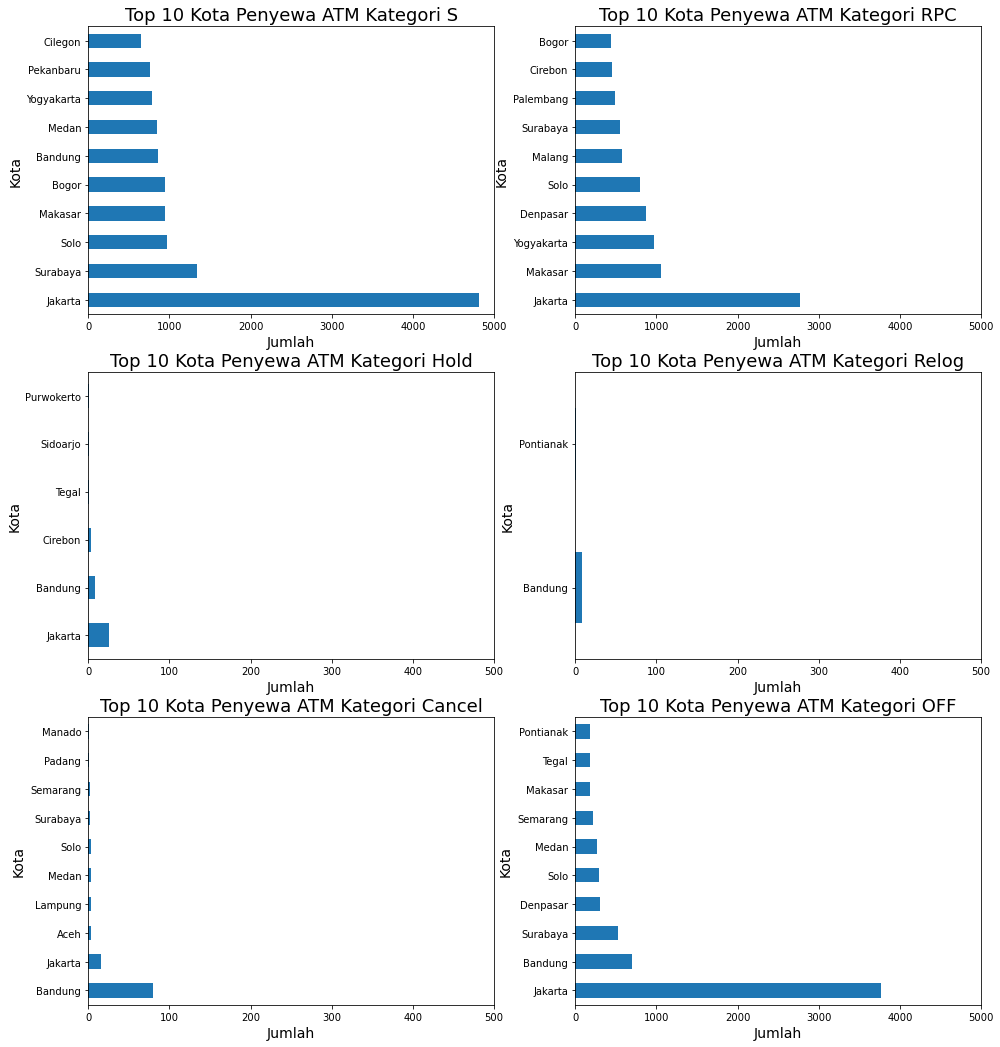

In [24]:
#proses ini merupakan proses visualisasi data untuk memudahkan analisis. Karena kota yang terlibat banyak sekali sehingga proses
#analisis hanya dilakukan pada kota - kota yang paling banyak dalam hal sewa menyewa atm
import matplotlib.pyplot as plt
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
total_S.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Top 10 Kota Penyewa ATM Kategori S", fontsize=18)
plt.ylabel('Kota',fontsize=14)
plt.xlabel('Jumlah',fontsize=14)
plt.xlim(0,5000)
plt.subplot(3,2,2)
total_RPC.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Top 10 Kota Penyewa ATM Kategori RPC", fontsize=18)
plt.ylabel('Kota',fontsize=14)
plt.xlabel('Jumlah',fontsize=14)
plt.xlim(0,5000)
plt.subplot(3,2,3)
total_Hold.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Top 10 Kota Penyewa ATM Kategori Hold", fontsize=18)
plt.ylabel('Kota',fontsize=14)
plt.xlabel('Jumlah',fontsize=14)
plt.xlim(0,500)
plt.subplot(3,2,4)
total_Relog.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Top 10 Kota Penyewa ATM Kategori Relog", fontsize=18)
plt.ylabel('Kota',fontsize=14)
plt.xlabel('Jumlah',fontsize=14)
plt.xlim(0,500)
plt.subplot(3,2,5)
total_Cancel.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Top 10 Kota Penyewa ATM Kategori Cancel", fontsize=18)
plt.ylabel('Kota',fontsize=14)
plt.xlabel('Jumlah',fontsize=14)
plt.xlim(0,500)
plt.subplot(3,2,6)
total_OFF.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Top 10 Kota Penyewa ATM Kategori OFF", fontsize=18)
plt.ylabel('Kota',fontsize=14)
plt.xlabel('Jumlah',fontsize=14)
plt.xlim(0,5000)
plt.show()

Dapat dilihat pada grafik diatas, dimana sewa menyewa atm ini dipisahkan berdasarkan kategori tertentu yaitu; S, RPC, Hold, 
Relog, Cancel, dan OFF.
1. Pada grafik sewa menyewa atm dengan status S, terlihat bahwa Jakarta paling banyak dalam sewa menyewa atm dengan jumlah 
 berkisar 4900 kali, yang disusul dengan kota Surabaya, Solo, Makasar, Bogor, dsb.
2. Pada grafik sewa menyewa atm dengan status RPC, terlihat Jakarta pula yang menjadi paling banyak dalam sewa menyewa atm 
dengan jumlah berkisar 2800 kali, disusul oleh kota Makasar, Yogyakarta, Denpasar, Solo, dsb.
3. Pada grafik sewa menyewa atm dengan status Hold (dapat diduga sebagai menunggu jawaban dari konsume mengenai kespakatan
sewa menyewa atm), terlihat bahwa Jakarta pula yang memiliki kasus tinggi dengan jumlah berkisar 20 kali, disusul oleh kota 
Bandung, Cirebon, Tegal, Sidoarjo, dan Purwokerto.
4. Pada grafik sewa menyewa atm dengan staus Relog (diduga sebagai konsep menunggu jawaban dari konsumen mengenai kesepakatan 
sewa menyewa atm), terlihat bahwa kota Bandung menjadi yang paling tinggi berkisar 10 kali disusul oleh Pontianak.
5. Pada grafik sewa menyewa atm dengan status Cancel (diduga sebagai tidak jadi dalam menyewa atm), terlihat kota Bandung yang
paling tinggi dengan jumlah berkisar 85 kali, disusul oeh Jakarta, Aceh, Lampung, Medan, Solo, dsb.
6. Pada grafik sewa menyewa atm dengan status OFF (diduga telah berhenti berlangganan), terlihat bahwa Jakarta menjadi yang
paling tinggi dengan jumlah sekitar 3850 kali, disusul oleh Bandung, Surabaya, Denpasar, Solo, dsb.

Kesimpulan secara kasar bahwa kota Jakarta sering berlangganan dalam sewa menyewa atm yang disusul oleh Surabaya, Solo, Makasar,
Bogor, Bandung, dsb. Sementara kota yang sering membataklan dan berhenti berlangganan adalah kota Jakarta, Bandung, Surabaya,
Denpasar, dsb. yang mana kesimpulan kasar ini akan dilanjutkan sebagai bahan pertimbangan dalam analisis lanjut.

In [25]:
#melihat jumlah total periode gabungan
total = df1.groupby(["Kota"])["Total Periode"].sum().to_frame()
total.sum()

Total Periode    42628
dtype: int64

In [26]:
#melihat persentase kasus sewa menyewa atm berdasarkan kategori
Persentase_S = total_S/42628*10000
Persentase_Hold = total_Hold/42628*10000
Persentase_RPC = total_RPC/42628*10000
Persentase_OFF = total_OFF/42628*10000
Persentase_Cancel = total_Cancel/42628*10000
Persentase_Relog = total_Relog/42628*10000

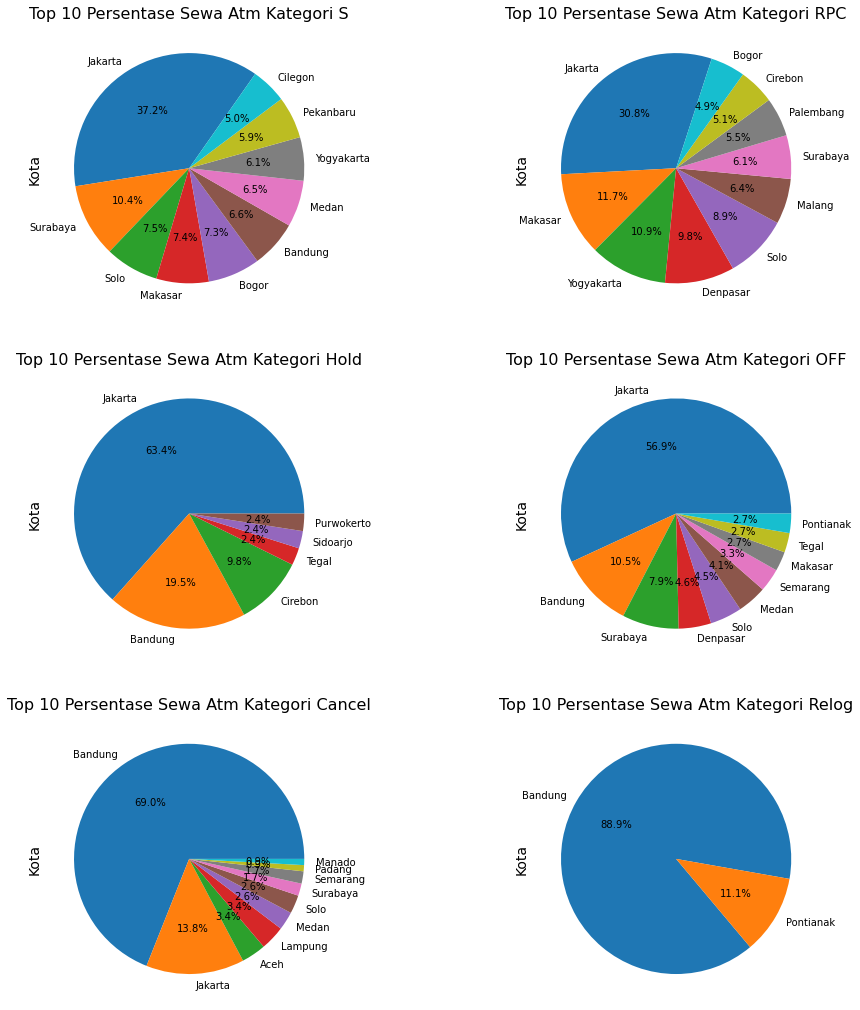

In [27]:
#visualisasi untuk melihat persentase kasus sewa menyewa atm berdasarkan kategori
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
Persentase_S.sort_values(ascending=False)[:10].plot(kind='pie',autopct='%1.1f%%', startangle=55)
plt.title("Top 10 Persentase Sewa Atm Kategori S", fontsize=16)
plt.ylabel('Kota',fontsize=14)
plt.subplot(3,2,2)
Persentase_RPC.sort_values(ascending=False)[:10].plot(kind='pie',autopct='%1.1f%%', startangle=72)
plt.title("Top 10 Persentase Sewa Atm Kategori RPC", fontsize=16)
plt.ylabel('Kota',fontsize=14)
plt.subplot(3,2,3)
Persentase_Hold.sort_values(ascending=False)[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title("Top 10 Persentase Sewa Atm Kategori Hold", fontsize=16)
plt.ylabel('Kota',fontsize=14)
plt.subplot(3,2,4)
Persentase_OFF.sort_values(ascending=False)[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title("Top 10 Persentase Sewa Atm Kategori OFF", fontsize=16)
plt.ylabel('Kota',fontsize=14)
plt.subplot(3,2,5)
Persentase_Cancel.sort_values(ascending=False)[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title("Top 10 Persentase Sewa Atm Kategori Cancel", fontsize=16)
plt.ylabel('Kota',fontsize=14)
plt.subplot(3,2,6)
Persentase_Relog.sort_values(ascending=False)[:10].plot(kind='pie',autopct='%1.1f%%', startangle=-10)
plt.title("Top 10 Persentase Sewa Atm Kategori Relog", fontsize=16)
plt.ylabel('Kota',fontsize=14)
plt.show()

Terlihat dalam diagram pie tersebut, Jakarta memang banyak berhubungan dengan sewa menyewa atm. Sehingga dalam analisis
selanjutnya harus menentukan kota mana sajakah yang banyak berhubungan dengan hal sewa menyewa atm berdasarkan persentase data
diatas. Dapat ditarik kesimpulan bahwa kota besar seperti Jakarta, Bandung, Makasar, Surabaya, Denpasar dapat dijadikan
sebagai bahan utama dalam analisis. Hal ini didasari oleh data persentase diatas, dimana persentase kota-kota yang disebutkan  (Jakarta, Surabaya, Makasar, Denpasar, dan Bandung) menonjol sangat besar di diagram pie.

In [28]:
#filter data untuk analisis lanjut dipilih berdasarkan persentase diagram pie dan dipilih karena merupakan kota besar
Jakarta = df1[df1['Kota'] == 'Jakarta']
Bandung = df1[df1['Kota'] == 'Bandung']
Makasar = df1[df1['Kota'] == 'Makasar']
Surabaya = df1[df1['Kota'] == 'Surabaya']
Denpasar = df1[df1['Kota'] == 'Denpasar']

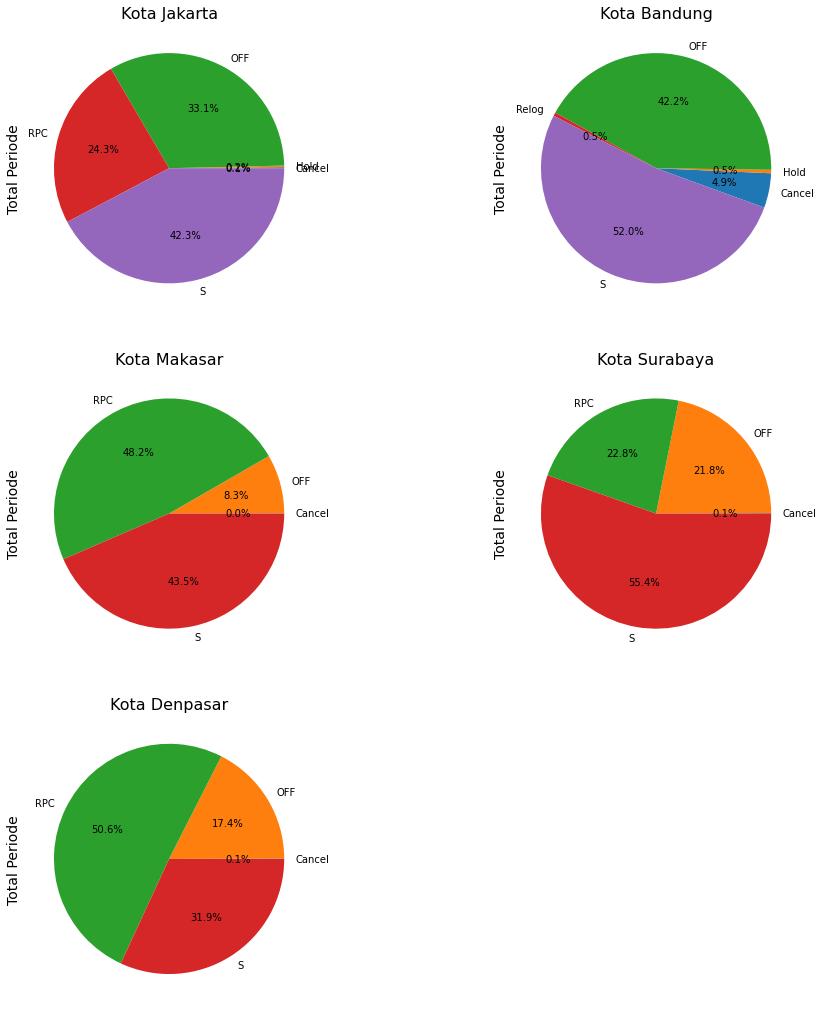

In [151]:
#Visualisasi untuk melihat perbandingan di berbagai kota besar yang telah menjadi bahan utama analisis
plt.figure(figsize=(16,18))
plt.clf()
plt.subplot(3,2,1)
Jakarta.groupby(['Status'])['Total Periode'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Kota Jakarta", fontsize=16)
plt.ylabel('Total Periode',fontsize=14)

plt.subplot(3,2,2)
Bandung.groupby(['Status'])['Total Periode'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=-20)
plt.title("Kota Bandung", fontsize=16)
plt.ylabel('Total Periode',fontsize=14)

plt.subplot(3,2,3)
Makasar.groupby(['Status'])['Total Periode'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Kota Makasar", fontsize=16)
plt.ylabel('Total Periode',fontsize=14)

plt.subplot(3,2,4)
Surabaya.groupby(['Status'])['Total Periode'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Kota Surabaya", fontsize=16)
plt.ylabel('Total Periode',fontsize=14)

plt.subplot(3,2,5)
Denpasar.groupby(['Status'])['Total Periode'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Kota Denpasar", fontsize=16)
plt.ylabel('Total Periode',fontsize=14)
plt.show()

Kesimpulan apabila status S dan RPC ini diduga sebagai status sukes dalam hal sewa menyewa, maka;
1. Pada kota Jakarta, memiliki persentase yang tinggi pada hal sewa menyewa atm berkisar 65%. Jakarta juga memiliki persentase yang cukup tinggi dalam hal membatalkan sewa menyewa atm atau berhenti berlangganan sebesar 35%
2. Pada kota Bandung, memiliki persentase yang hampir 50:50 antara sukses dalam berlangganan dengan berhenti berlangganan atau membatalkan sewa menyewa atm
3. Pada kota Makasar, kota ini bisa dibilang tinggi dalam hal sukses sewa menyewa atm dibandingkan dengan kota lainnya, dimana memiliki persentase sewa menyewa berkisar 92%
4. Pada Kota Surabaya, persentase sukses sewa menyewa berkisar 78% sementara untuk persentase pembatalan sewa menyewa berkisar
22%
5. Kota Denpasar, persentase sukses sewa menyewa berkisar 82%, sementara untuk persentase pembatalan sewa menyewa berkisar 18%

Apabila dibandingkan antar kelima kota besar tersebut, dapat dikatakan bahwa Makasar adalah kota yang paling stabil dalam hal
sewa menyewa atm, yang disusul oleh kota Denpasar, Surabaya, Jakarta, kemudian Bandung.

In [152]:
#filter data untuk melihat total apabila S dan RPC adalah status sukses
perbandingan = df1[(df1['Kota'] == 'Jakarta')|(df1['Kota'] == 'Bandung')|(df1['Kota'] == 'Makasar')|
                    (df1['Kota'] == 'Denpasar')|(df1['Kota'] == 'Surabaya')]

In [153]:
#proses penangan mapping untuk status apabila S dan RPC adalah sukses
#Proses ini sama dengan proses sebelumnya dalam memfilter data sebelumnya
#Perbedaan terletak pada data yang diguakan hanya data-data lima kota yang dijadikan sebagai kota utama bahan analisis
mapp = {'S':'Sukses',
       'RPC':'Sukses',
       'OFF':'Gagal',
       'Relog':'Gagal',
       'OFF':'Gagal',
       'Hold':'Gagal'}
perbandingan['Status'] = perbandingan['Status'].apply(mapp.get)
perbandingan.replace({None: 0}) 
total_perbandingan = perbandingan.drop(perbandingan.columns[[0,1,2,3,4,5,6,-1]], axis=1)   
total_perbandingan = total_perbandingan.where(perbandingan.isna(),1).fillna(0) 
total_perbandingan['Total Periode'] = total_perbandingan.sum(axis=1) 
perbandingan = perbandingan.drop(perbandingan.columns[[-1]], axis=1) 
sum_perbandingan = total_perbandingan['Total Periode']
perbandingan = pd.concat([perbandingan, sum_perbandingan], axis=1).reindex(perbandingan.index)
perbandingan.groupby(["Kota","Status"])["Total Periode"].sum()
f = perbandingan[['Kota','Status','Total Periode']]     
total_Sukses = perbandingan[perbandingan['Status'] == 'Sukses'].groupby(['Kota'])['Total Periode'].sum()
total_Gagal = perbandingan[perbandingan['Status'] == 'Gagal'].groupby(['Kota'])['Total Periode'].sum()

<ipython-input-153-dc93986dfc27>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perbandingan['Status'] = perbandingan['Status'].apply(mapp.get)


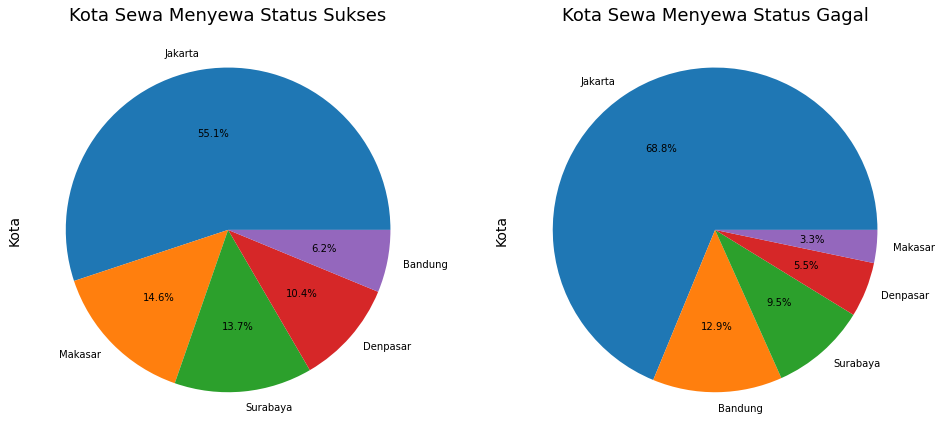

In [154]:
#Visualisasi perbandingan sukses dan gagal
plt.figure(figsize=(16,18))
plt.subplot(1,2,1)
total_Sukses.sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%')
plt.title("Kota Sewa Menyewa Status Sukses", fontsize=18)
plt.ylabel('Kota',fontsize=14)
plt.subplot(1,2,2)
total_Gagal.sort_values(ascending=False)[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title("Kota Sewa Menyewa Status Gagal", fontsize=18)
plt.ylabel('Kota',fontsize=14)
plt.show()

1. Pada grafik sewa menyewa kategori Sukses, Jakarta merupakan kota yang memiliki jumlah sewa menyewa yang tinggi dibandingkan 
dengan lima kota lainnya, sekitar 56% disusul oleh Makasar, Surabaya, Denpasar dan Bandung.
2. Pada grafik sewa menyewa kategori Gagal, Jakarta pula yang banyak sekali mengalami kegagalan dalam hal sewa menyewa, disusul
oleh Bandung, Surabaya, Denpasar dan Makasar.

Kesimpulan yang dapat diambil bahwa ternyata Makasar adalah kota yang stabil dengan tingkat Sukses tinggi dalam hal sewa 
menyewa atm. Sementara Bandung merupakan kota yang sebaliknya, dimana memiliki tingkat sukses rendah atau sering mengalami
gagal dalam hal sewa menyewa atau dengan kata lain sering membatalkan dalam hal sewa menyewa atm

Tentunya kesimpulan tersebut tidak benar sepenuhnya, karena data yang disediakan seperti status RPC, OFF, dsb tidak dijelaskan maksud dari kata tersebut    

Setelah menganalisis sheet excel bagian 'SEWAATM', hal selanjutnya adalah menganalisis bagian sheet lainnya, yaitu 'Data Aktifitas'

In [155]:
#membaca sheet Data Aktifitas
df2 = xl.parse('Data Aktifitas', header=3)

In [156]:
#Menghapus kolom yang tidak digunakan dalam analisis
df2= df2.drop(df2.columns[[0,1,2,3,7,8,9,10,11,13]],axis=1)
df2 = df2.dropna()

In [167]:
#Melihat apakah ada whitespace di kolom Jenis Layanan
d = df2[(df2['Jenis Layanan'] == ' ')]
print(d)

               Lokasi Jenis Layanan        Laporan Kerusakan               CSE
185         KCP SOLOK                                              Doni Indra 
2071   RS MITRA JAMBI                                          Yovi Kurniawan 
2073   RS MITRA JAMBI                Preventive Maintenance        Doni Indra 
2122  STMIK PONTIANAK                Preventive Maintenance   Hendri Apridzal 
2775  MENARA KUNINGAN                                            Hadi Warsito 


In [168]:
#Menghapus informasi yang kosong (white space) berdasarkan kolom Jenis Layanan
index = [185,2071,2073,2122,2775]
for y in index:
    df2 = df2[df2.index != y]

In [169]:
#Melihat jenis apa saja Laporan kerusakan yang terjadi dalam dataset 'Data Aktifitas'
df2['Laporan Kerusakan'].unique()

array(['Hardware ', 'Preventive Maintenance ', ' ', 'Installation ',
       'Non Hardware ', 'PM', 'preventif maintenes'], dtype=object)

In [170]:
#Terlihat bahwa terdapat duplikasi data yang berbeda pengetikan, sehingga harus ditangani menggunakan konsep mapping
mapping = { 'Hardware ':'Hardware', 
           'Preventive Maintenance ':'Preventive Maintenance', 
           ' ':'None', 
           'Installation ':'Installation',
           'Non Hardware ':'Non Hardware', 
           'PM':'PM', 
           'preventif maintenes':'Preventive Maintenance'}
df2['Laporan Kerusakan'] = df2['Laporan Kerusakan'].apply(mapping.get)

In [171]:
#Melihat jenis layanan apa saja yang dapat ditangani
df2['Jenis Layanan'].unique()

array(['Error ', 'PM 1 ', 'PM pertama', 'PM 2 ', 'Error & PM ', 'Other ',
       'PM 3 ', 'Installation ', 'Support ', '3rd PM', 'Online '],
      dtype=object)

In [172]:
#Pada kolom jenis layanan pula terlihat ada duplikasi, sehingga harus di cleansing
mapping = {'Error ':'Error', 
           'PM 1 ':'PM 1',
           'PM pertama': 'PM 1', 
           'PM 2 ':'PM 2',
           'Error & PM ':'Error & PM', 
           'Other ':'Other',
           'PM 3 ':'PM 3',
           'Installation ':'Installation', 
           'Support ':'Support', 
           '3rd PM':'PM 3',
           'Online ':'Online'}
df2['Jenis Layanan'] = df2['Jenis Layanan'].apply(mapping.get)

In [173]:
print(df2.head())       #Melihat dataset lima baris paling atas

           Lokasi Jenis Layanan       Laporan Kerusakan                CSE
0  RUANG UAT DPTI         Error                Hardware           M. Yani 
1  PLN AHMAD YANI         Error                Hardware   Hendri Apridzal 
3    GRAHA ENERGY          PM 1  Preventive Maintenance        ozi medina 
5       BKP MEDAN          PM 1  Preventive Maintenance  Rajamin Nasution 
6       BKP MEDAN          PM 1  Preventive Maintenance  Rajamin Nasution 


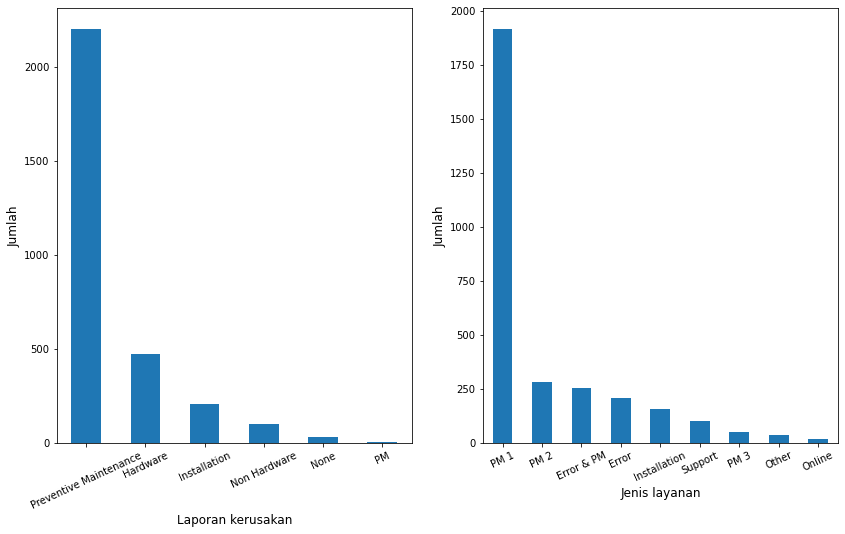

In [174]:
#Visualisasi data untuk melihat laporan kerusakan dan jenis layanan yang ditangani
plt.figure(figsize=(14,8))
plt.subplot(1,2,2)
df2['Jenis Layanan'].sort_values(ascending=True).value_counts().plot(kind='bar')
plt.ylabel("Jumlah", fontsize=12)
plt.xlabel("Jenis layanan", fontsize=12)
plt.xticks(rotation=25)
plt.subplot(1,2,1)
df2['Laporan Kerusakan'].sort_values(ascending=True).value_counts().plot(kind='bar')
plt.ylabel("Jumlah", fontsize=12)
plt.xlabel("Laporan kerusakan", fontsize=12)
plt.xticks(rotation=25)
plt.show()

Pada grafik bar Laporan kerusakan diatas, terlihat bahwa kerusakan paling banyak berasal dari prefentif atau penanganan tindakan
sebelum kerusakan terjadi, yang disusul oleh kerusakan hardware, installasi, non hardware, dan kerusakaan lainnya.
Sementara pada grafik bar jenis layanan diatas, terlihat bahwa layanan yang sering ditangani adalah PM 1, PM2, dsb.

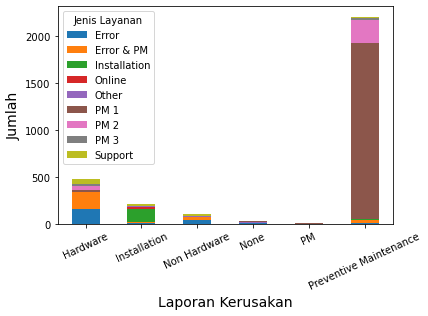

In [176]:
#Melihat perbandingan tingkat antara laporan kerusakan dengan jenis layanan yang ditangani
df2.groupby(["Laporan Kerusakan","Jenis Layanan"])['Lokasi'].size().unstack().plot(kind='bar',stacked=True)
plt.ylabel("Jumlah", fontsize=14)
plt.xlabel("Laporan Kerusakan", fontsize=14)
plt.xticks(rotation=25)
plt.show()

Pada grafik diatas terlihat bahwa kerusakan yang sering dialami adalah pencegahan kerusakan dengan tindakan yang ditangani 
adalah berjenis layanan PM1, disusul dengan kerusakan Hardware dengan tindakan yang ditangani adalah berjenis layanan Error & PM, lalu kerusakan installasi dengan tindakan yang ditangani adalah berjenis layanan installasi

Catatan: Tidak diberikan informasi apapun mengenai istial PM 1, PM2, PM3, dsb